<a href="https://colab.research.google.com/github/walter789/VPindoor/blob/main/vpInd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd

print("TensorFlow Version:", tf.__version__)
print("OpenCV Version:", cv2.__version__)
print("NumPy Version:", np.__version__)
print("Pandas Version:", pd.__version__)


TensorFlow Version: 2.12.0
OpenCV Version: 4.8.0
NumPy Version: 1.23.5
Pandas Version: 1.5.3


Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


For unzipping Toulouse dataset


In [ ]:
!unzip "/content/drive/My Drive/Datasets/toulouse/tvpd.zip"


Archive:  /content/drive/My Drive/Datasets/toulouse/tvpd.zip
  inflating: README.txt              
  inflating: camera_intrinsics.mat   
   creating: tvpd_dataset/a_modifier/
  inflating: tvpd_dataset/img_1284.jpg  
  inflating: tvpd_dataset/img_1284.mat  
  inflating: tvpd_dataset/img_1284.txt  
  inflating: tvpd_dataset/img_1285.jpg  
  inflating: tvpd_dataset/img_1285.mat  
  inflating: tvpd_dataset/img_1285.txt  
  inflating: tvpd_dataset/img_1295.jpg  
  inflating: tvpd_dataset/img_1295.mat  
  inflating: tvpd_dataset/img_1295.txt  
  inflating: tvpd_dataset/img_1306.jpg  
  inflating: tvpd_dataset/img_1306.mat  
  inflating: tvpd_dataset/img_1306.txt  
  inflating: tvpd_dataset/img_1313.jpg  
  inflating: tvpd_dataset/img_1313.mat  
  inflating: tvpd_dataset/img_1313.txt  
  inflating: tvpd_dataset/img_1317.jpg  
  inflating: tvpd_dataset/img_1317.mat  
  inflating: tvpd_dataset/img_1317.txt  
  inflating: tvpd_dataset/img_1325.jpg  
  inflating: tvpd_dataset/img_1325.mat  
  inf

Toulouse dataset existence check


In [ ]:
!ls "/content/drive/My Drive/Datasets/toulouse/tvpd_dataset"


img_1284.jpg  img_1767.mat  img_1854.txt  img_1920.jpg	img_1995.mat
img_1284.mat  img_1767.txt  img_1858.jpg  img_1920.mat	img_1995.txt
img_1284.txt  img_1768.jpg  img_1858.mat  img_1920.txt	img_1998.jpg
img_1285.jpg  img_1768.mat  img_1858.txt  img_1921.jpg	img_1998.mat
img_1285.mat  img_1768.txt  img_1862.jpg  img_1921.mat	img_1998.txt
img_1285.txt  img_1775.jpg  img_1862.mat  img_1921.txt	img_2499.jpg
img_1295.jpg  img_1775.mat  img_1862.txt  img_1924.jpg	img_2499.mat
img_1295.mat  img_1775.txt  img_1864.jpg  img_1924.mat	img_2499.txt
img_1295.txt  img_1783.jpg  img_1864.mat  img_1924.txt	img_2502.jpg
img_1306.jpg  img_1783.mat  img_1864.txt  img_1925.jpg	img_2502.mat
img_1306.mat  img_1783.txt  img_1865.jpg  img_1925.mat	img_2502.txt
img_1306.txt  img_1791.jpg  img_1865.mat  img_1925.txt	img_2521.jpg
img_1313.jpg  img_1791.mat  img_1865.txt  img_1929.jpg	img_2521.mat
img_1313.mat  img_1791.txt  img_1866.jpg  img_1929.mat	img_2521.txt
img_1313.txt  img_1793.jpg  img_1866.mat  img_19

For NYU depth V2 dataset


In [ ]:
!pip install h5py



In [ ]:
import h5py

filename = '/content/drive/My Drive/Datasets/NYUv2/nyu_depth_v2_labeled.mat'
with h5py.File(filename, 'r') as f:
    # List all groups and datasets in the file
    for key in f.keys():
        print(key)

    # Load specific datasets as needed
    # For example, to load the 'images' dataset:
    images = f['images'][:]


#refs#
#subsystem#
accelData
depths
images
instances
labels
names
namesToIds
rawDepthFilenames
rawDepths
rawRgbFilenames
sceneTypes
scenes


In [ ]:
import os
import shutil

# Path to the folder containing the tvpd_dataset and indoor folders in Google Drive
base_folder = "/content/drive/MyDrive/Datasets/toulouse/"

# Path to the tvpd_dataset folder
tvpd_dataset_folder = os.path.join(base_folder, "tvpd_dataset")

print(tvpd_dataset_folder)

# Path to the indoor folder inside tvpd_dataset
indoor_folder = os.path.join(tvpd_dataset_folder, "indoor")



# List all files inside the indoor folder with .img extension
indoor_img_files = [f for f in os.listdir(indoor_folder) if f.endswith(".jpg")]

print(indoor_img_files)



# Loop through each .img file in the indoor folder
for i in indoor_img_files:
    # Extract the filename without the extension

    file_name_without_extension = os.path.splitext(i)[0]


    # Look for .txt and .mat files with the same name in tvpd_dataset folder
    txt_file_path = os.path.join(tvpd_dataset_folder, file_name_without_extension + ".txt")
    mat_file_path = os.path.join(tvpd_dataset_folder, file_name_without_extension + ".mat")

    # Check if .txt and .mat files exist and move them to the indoor folder
    if os.path.exists(txt_file_path):
        shutil.move(txt_file_path, os.path.join(indoor_folder, file_name_without_extension + ".txt"))
        print(f"Moved {file_name_without_extension}.txt to indoor folder.")
    if os.path.exists(mat_file_path):
        shutil.move(mat_file_path, os.path.join(indoor_folder, file_name_without_extension + ".mat"))
        print(f"Moved {file_name_without_extension}.mat to indoor folder.")



/content/drive/MyDrive/Datasets/toulouse/tvpd_dataset
['img_1306.jpg', 'img_1313.jpg', 'img_1285.jpg', 'img_1284.jpg', 'img_1295.jpg', 'img_1331.jpg', 'img_1453.jpg', 'img_1741.jpg', 'img_1365.jpg', 'img_1796.jpg', 'img_1825.jpg', 'img_1821.jpg', 'img_1835.jpg', 'img_1854.jpg', 'img_1851.jpg', 'img_1850.jpg', 'img_1865.jpg', 'img_1866.jpg', 'img_1873.jpg', 'img_1870.jpg', 'img_1871.jpg', 'img_1862.jpg', 'img_1884.jpg', 'img_1864.jpg', 'img_1892.jpg', 'img_1893.jpg', 'img_1939.jpg', 'img_1925.jpg', 'img_1929.jpg', 'img_1921.jpg', 'img_1932.jpg', 'img_1924.jpg', 'img_1936.jpg', 'img_1941.jpg', 'img_1952.jpg', 'img_1983.jpg', 'img_1989.jpg', 'img_1986.jpg', 'img_1976.jpg', 'img_1995.jpg', 'img_2502.jpg', 'img_1998.jpg', 'img_2627.jpg', 'img_2553.jpg', 'img_2576.jpg', 'img_2632.jpg', 'img_2551.jpg', 'img_2641.jpg']
heeyyyyyuui
heeyyynmj
Moved img_1306.txt to indoor folder.
Moved img_1306.mat to indoor folder.
heeyyyyyuui
heeyyynmj
Moved img_1313.txt to indoor folder.
Moved img_1313.mat to 

In [ ]:
import scipy.io
mat = scipy.io.loadmat('/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/indoor/img_1284.mat')
print(mat['segments'])
print(mat['vp_association'])

[[  13  665  986  557]
 [ 201  116 1051  245]
 [1301  796  697 1051]
 [1347  801  774 1060]
 [  32 1041  866  804]
 [ 454  155  476  805]
 [ 794  240  805  732]
 [   2  464   30 1040]
 [1015  241 1016  423]
 [ 153  348  176  913]
 [ 676  315  683  713]
 [   1  344  762  292]
 [  11  584  771  646]
 [  19  768  420  847]
 [ 876  540   68  511]]
[[1 1 1 1 1 2 2 2 2 2 2 3 3 3 3]]


In [ ]:
import os
path1="/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/indoor"
print(len(sorted([f for f in os.listdir(path1) if f.endswith('.jpg')])))


48


[1 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3]
1
[0 7 5 4]
7
[1]
[[ 605  701  610 1077]
 [ 945  685 1325 1077]
 [ 838  689 1093 1077]
 [ 695  698  791 1077]
 [ 635   97  647    8]
 [ 460    6  493   80]
 [ 923  104 1064    4]]
[600.38228767 353.74803308]


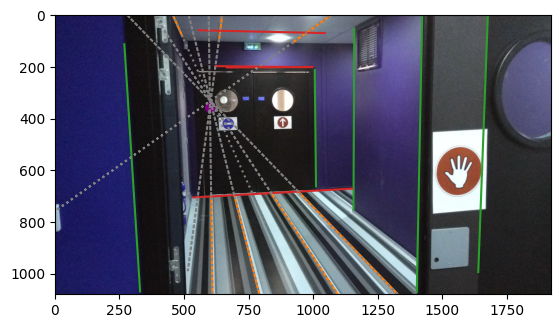

In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import cv2
import numpy as np

def load_data(image_name):
  mat = sio.loadmat(f'/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/{image_name}.mat')
  segments = mat['segments']
  vp_assoc = mat['vp_association'][0]
  return segments, vp_assoc

def extend_segments(segments, vp_assoc):
  lines = []
  for vp in get_main_vps(vp_assoc):
    vp_segments = get_vp_segments(segments, vp_assoc, vp)
    print(vp_segments)
    for seg in vp_segments:
      x1, y1, x2, y2 = seg
      dx = x2 - x1
      dy = y2 - y1

      extend_x = [x1, x1-dx*10, x2, x2+dx*10]
      extend_y = [y1, y1-dy*10, y2, y2+dy*10]

      lines.append([extend_x, extend_y])
  return lines

def get_main_vps(vp_assoc):
  vp_counts = np.bincount(vp_assoc)


  counts = np.bincount(vp_assoc)
  print(counts)

  max_count = np.max(counts)
  print(max_count)
  most_repeated_elements = []
  for i, count in enumerate(counts):
    if count == max_count:
      most_repeated_elements.append(i)
      print(most_repeated_elements)
  return most_repeated_elements


def get_vp_segments(segments, vp_assoc, vp):
  return segments[np.where(vp_assoc == vp)[0]]

def find_vps(lines):
  vps = []
  for i in range(len(lines)):
    for j in range(i+1, len(lines)):
      x1, y1 = lines[i]
      x2, y2 = lines[j]
      point = find_intersection(x1, y1, x2, y2)
      if point is not None:
        vps.append(point)
  return np.array(vps)

def find_intersection(x1, y1, x2, y2):
  m1 = (y1[1] - y1[0]) / (x1[1] - x1[0])
  b1 = y1[0] - m1 * x1[0]

  m2 = (y2[1] - y2[0]) / (x2[1] - x2[0])
  b2 = y2[0] - m2 * x2[0]

  x = (b2 - b1) / (m1 - m2)
  y = m1 * x + b1

  return x, y

def plot(image, segments, lines, main_vp):
  print(main_vp)
  plt.imshow(image)
  plt.xlim([0, image.shape[1]])
  plt.ylim([image.shape[0], 0])

  for i, seg in enumerate(segments):


    x1, y1, x2, y2 = seg
    vp = vp_assoc[i]
    color = (vp - 1)+1


    plt.plot([x1, x2], [y1, y2], '-', color=f'C{color}')

  for line in lines:
    x, y = line
    plt.plot(x, y, ':', color='gray')

  plt.scatter(main_vp[0], main_vp[1], s=50, color='purple')
  plt.show()

# Example usage
image_name = 'img_1932'


image_path = f'/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/{image_name}.jpg'
image = cv2.imread(image_path)
ab= sio.loadmat(f'/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/{image_name}.mat')
print(ab['vp_association'][0])
bb1=ab['vp_association'][0]
counts = np.bincount(bb1)
np.argmax(counts)
print(np.argmax(counts))

segments, vp_assoc = load_data(image_name)
lines = extend_segments(segments, vp_assoc)
vps = find_vps(lines)

main_vp = vps[np.argmax(vps[:, 1])]

plot(image, segments, lines, main_vp)

In [ ]:
import os

def gather_data_from_mats(directory_path, image_names):
    data = {}

    for image_name in image_names:
        segments, vp_assoc = load_data(image_name)
        data[image_name] = {'segments': segments, 'vp_assoc': vp_assoc}

    return data

# Specify the directory where the .mat files are stored
directory_path = '/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/indoor'

# Get a list of all the image names (without extensions) in the directory
image_names = [os.path.splitext(filename)[0] for filename in os.listdir(directory_path) if filename.endswith('.mat')]
print(image_names)

data = gather_data_from_mats(directory_path, image_names)


['img_1306', 'img_1313', 'img_1295', 'img_1284', 'img_1285', 'img_1331', 'img_1741', 'img_1365', 'img_1453', 'img_1821', 'img_1796', 'img_1825', 'img_1835', 'img_1851', 'img_1854', 'img_1850', 'img_1870', 'img_1864', 'img_1873', 'img_1865', 'img_1866', 'img_1871', 'img_1862', 'img_1892', 'img_1884', 'img_1893', 'img_1924', 'img_1932', 'img_1936', 'img_1929', 'img_1921', 'img_1925', 'img_1939', 'img_1952', 'img_1941', 'img_1976', 'img_1983', 'img_1986', 'img_1989', 'img_1995', 'img_1998', 'img_2502', 'img_2551', 'img_2553', 'img_2627', 'img_2576', 'img_2632', 'img_2641']


In [ ]:
print(data)

{'img_1306': {'segments': array([[1107,  360, 1327,   27],
       [ 732,   61,  802,  353],
       [ 384,   32,  626,  347],
       [1536,  362, 1912,  163],
       [ 533,  406,  525,  650],
       [1562,  422, 1566,  629],
       [ 740,  471,  738,  639],
       [  92,  397,   80,  642],
       [1439,  666,   80,  651],
       [1913,  421,   97,  397],
       [1834,  371,   66,  341],
       [1298,  703,  524,  697]]), 'vp_assoc': array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3])}, 'img_1313': {'segments': array([[  91,   37,  624,  154],
       [   4,   67,  546,  175],
       [ 391,  369,  696,  395],
       [ 411,  944,  584,  909],
       [ 266,  339,  276,  972],
       [ 743,  404,  748,  863],
       [1146,  369, 1157,  975],
       [1198,  318, 1211,  981],
       [1330,  353, 1337,  949],
       [1698,  103, 1703, 1039],
       [   9,  356, 1687,   74],
       [ 744,  403, 1550,  333],
       [1694, 1035,  753,  886]]), 'vp_assoc': array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3])}, '

In [ ]:


import cv2
import os

def process_image(img_path, output_path, resize_dim=(256, 256)):
    """
    Function to crop, resize and normalize an image.

    Parameters:
    - img_path: Path to the input image.
    - output_path: Path to save the processed image.
    - resize_dim: Tuple indicating dimensions to resize the image to. Default is (256, 256).
    """
    # Read the image
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)

    # Cropping (assuming the sky is at the top 1/5 and floor at bottom 1/5 - you can adjust these ratios)
    height, width, _ = img.shape
    crop_top = int(0.2 * height)
    crop_bottom = int(0.8 * height)
    cropped_img = img[crop_top:crop_bottom, :]

    # Resizing
    resized_img = cv2.resize(cropped_img, resize_dim)

    # Normalization (to [0,1])
    normalized_img = resized_img / 255.0

    # Save the processed image
    cv2.imwrite(output_path, normalized_img * 255)  # Denormalize to save as regular image

    return normalized_img

# Example Usage:
input_dir = "/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/indoor"
output_dir = "/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/ind_proces_images"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for img_name in os.listdir(input_dir):
    if img_name.endswith(('.jpg')):  # check for image files
        input_img_path = os.path.join(input_dir, img_name)
        output_img_path = os.path.join(output_dir, img_name)
        process_image(input_img_path, output_img_path)




KeyboardInterrupt: ignored

Data Augmentation.

Data augmentation is a powerful technique to increase the diversity of your training dataset by applying random transformations. This helps in making the model more robust and potentially prevents overfitting.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup Data Augmentation configurations
datagen = ImageDataGenerator(
    rotation_range=10,  # Random rotations between -10 to +10 degrees
    width_shift_range=0.1,  # Random horizontal shifts
    height_shift_range=0.1,  # Random vertical shifts
    zoom_range=0.1,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Strategy used for filling in newly created pixels
)

# Assuming you have a numpy array of images X and their corresponding labels Y
# For demonstration purposes, let's consider a single image
sample_image = tf.keras.preprocessing.image.load_img("/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/indoor/img_1284.jpg")
sample_image_array = tf.keras.preprocessing.image.img_to_array(sample_image)
sample_image_array = sample_image_array.reshape((1,) + sample_image_array.shape)

# Generates augmented images (for visualization and understanding)
save_here = "/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/ind_aug_images"

if not os.path.exists(save_here):
    os.makedirs(save_here)

# Generate and save augmented images
i = 0
for batch in datagen.flow(sample_image_array, batch_size=1, save_to_dir=save_here, save_prefix='aug', save_format='jpeg'):
    i += 1
    if i > 20:  # Generate 20 sample augmented images
        break


Model Architecture.

Given the nature of the task – detecting vanishing points – this is essentially a regression problem where you're predicting the coordinates of the vanishing points.


Use a pre-trained model like VGG16, ResNet50, or MobileNet as a feature extractor. They have been trained on ImageNet and can extract a wide variety of features from the images.
Add custom fully connected layers to tailor the architecture to your specific task.
Here's a basic example using ResNet50 with TensorFlow and Keras:Use a pre-trained model like VGG16, ResNet50, or MobileNet as a feature extractor. They have been trained on ImageNet and can extract a wide variety of features from the images.
Add custom fully connected layers to tailor the architecture to your specific task.
Here's a basic example using ResNet50 with TensorFlow and Keras:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the custom layers
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='linear')(x)  # Two units for the x and y coordinates

# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

**Training the Model**


Prepare the Data:
We'll extract segments from the data dictionary and stack them together into a single array.
The vp_assoc will be our target array.
Here's the code for preparing the data:

In [ ]:
segments_list = []
vp_assoc_list = []

# Extract segments and their VP associations
for key in data:
    segments_list.append(data[key]['segments'])
    vp_assoc_list.append(data[key]['vp_assoc'])

# Convert lists to arrays
X = np.vstack(segments_list)  # This will be our feature array
y = np.hstack(vp_assoc_list)  # This will be our target array


Splitting the Data:
Now, let's split the data into training and validation sets:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training:

Given the nature of your data and the task, we'll begin with a simple classifier. A Random Forest classifier is a good starting point due to its interpretability, ease of use, and ability to handle high-dimensional data without much preprocessing.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)


Model training

In [ ]:
# Train the model
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Validation:
After training, we need to validate the model's performance using the validation set:

In [ ]:
# Predict on validation set
y_pred = clf.predict(X_val)

# Calculate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Validation Accuracy: 81.17%


Building on our current progress:

1. Feature Importance Analysis:
The Random Forest model allows us to inspect which features (or coordinates in our case) have the most predictive power in determining the vanishing point associations.

Here's a simple code to visualize the feature importances:

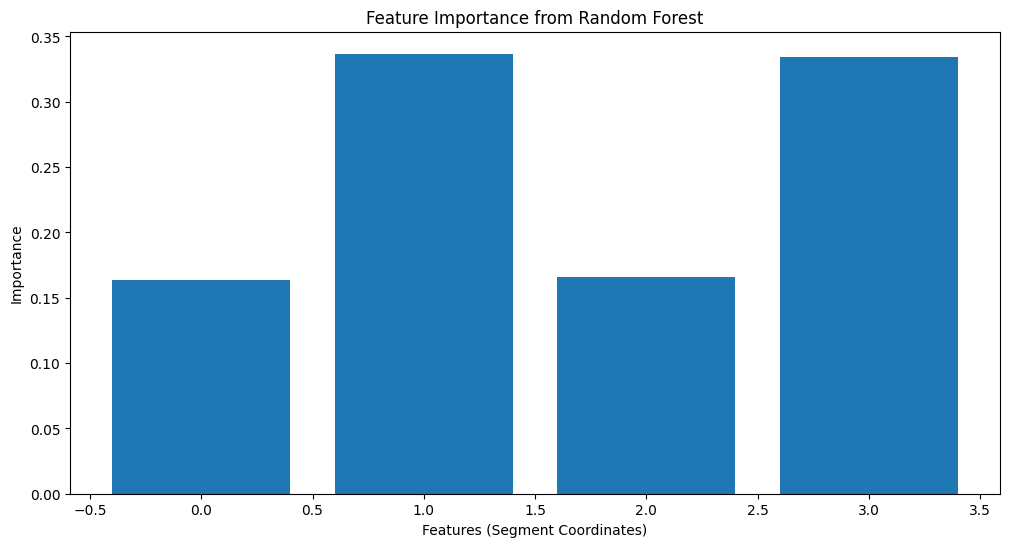

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = clf.feature_importances_

# Plotting the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), feature_importances)
plt.xlabel('Features (Segment Coordinates)')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


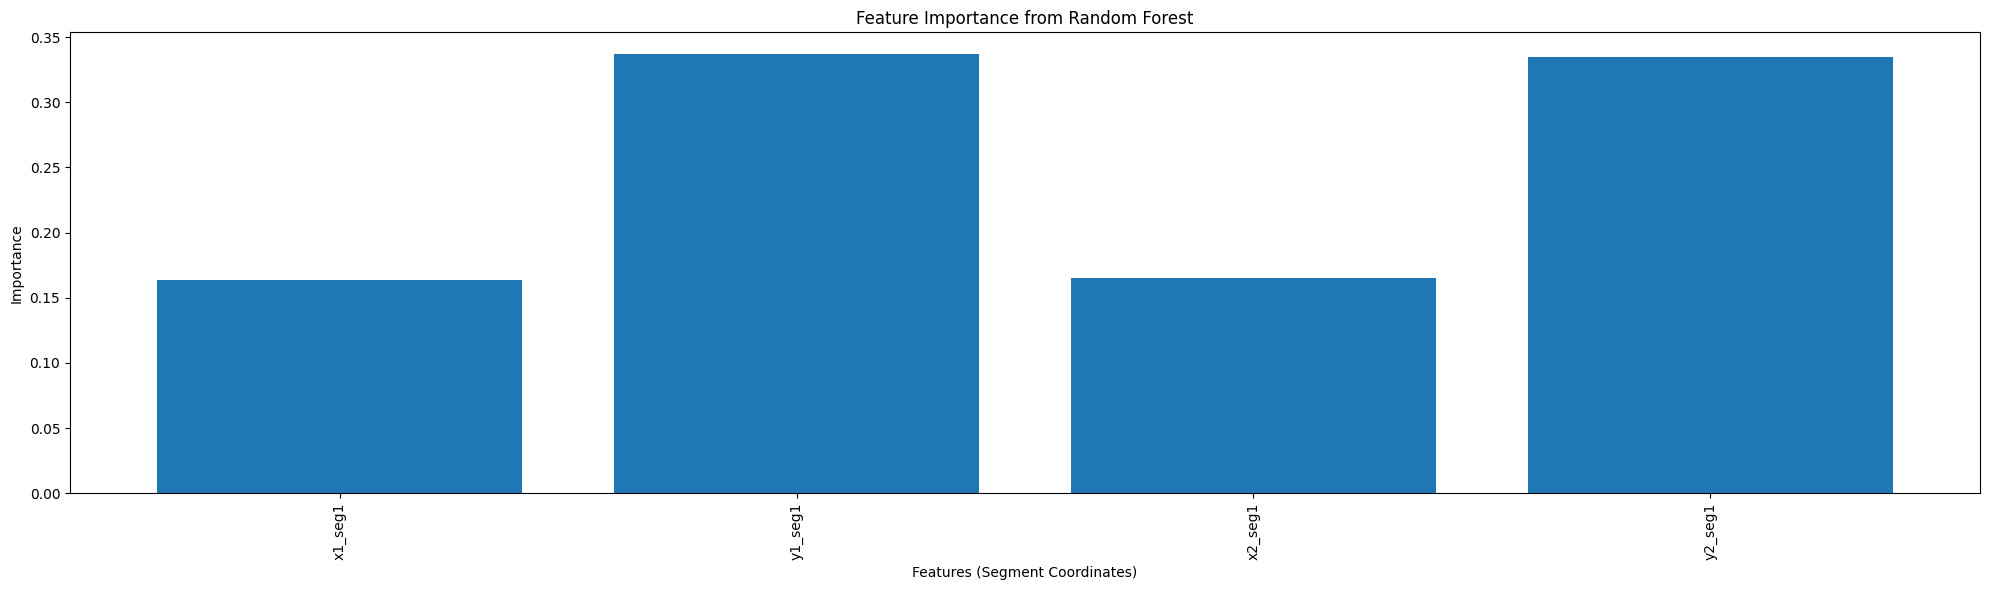

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = clf.feature_importances_

# Segment coordinate labels for x-axis
segment_labels = ["x1", "y1", "x2", "y2"]
all_labels = []
for i in range(X_train.shape[1] // 4):  # loop through each segment
    all_labels.extend([f"{label}_seg{i+1}" for label in segment_labels])

# Plotting the feature importances
plt.figure(figsize=(20, 6))
plt.bar(range(X_train.shape[1]), feature_importances, tick_label=all_labels)
plt.xlabel('Features (Segment Coordinates)')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


The reported importances for the
�
1
x1 and
�
2
x2 coordinates being roughly equal, and similarly for the
�
1
y1 and
�
2
y2 coordinates, provide some interesting insights:

Equal Importance for Start and End Points: The Random Forest classifier might be using both the start and end points of a segment with approximately equal weight to make its decisions. This could suggest that the position of the segment as a whole in the image is what's primarily important, rather than the orientation or length of the segment.

Higher Importance for Y-coordinates: The higher importance associated with
�
1
y1 and
�
2
y2 coordinates indicates that the vertical position of the segments in the image is more indicative or discriminative for vanishing point classification than the horizontal position. This might make intuitive sense in indoor environments, especially for floor and ceiling vanishing points, as the vertical alignment would be crucial.

Feature Engineering Opportunities: These insights can lead to potential feature engineering opportunities. For example, you might consider creating new features such as segment lengths, orientations, or distances from image center to potentially improve classification performance.

Domain Knowledge Application: If you have domain knowledge or prior information about the type of indoor scenes, you can potentially reason about why the y-coordinates are more informative. For example, in many indoor photos, the ceiling and floor can provide strong vanishing points, and thus the vertical position of segments might be more critical.

These findings and insights provide a foundation for further improving and iterating on your model. You might consider different features, models, or even hybrid approaches to improve accuracy and interpretability further. Remember, feature importances give you a view into what the model is considering "important," but they don't necessarily tell you why or how to optimize further. That's where domain knowledge, further experimentation, and iteration come into play.







In [ ]:
print(X.shape)

X = X.reshape(-1, 4)
print(X.shape)
print(X[:5, :])





(768, 4)
(768, 4)
[[1107  360 1327   27]
 [ 732   61  802  353]
 [ 384   32  626  347]
 [1536  362 1912  163]
 [ 533  406  525  650]]


Error Analysis to see where the Random Forest model might be making incorrect predictions. This will give us insight into potential areas of improvement.

Here's the code to analyze the model's errors on the validation set:

In [ ]:
# Predictions on validation set
y_pred = clf.predict(X_val)

# Find where predictions are incorrect
incorrect_indices = np.where(y_pred != y_val)[0]

# Printing out the number of incorrect predictions for context
print(f"Total Incorrect Predictions: {len(incorrect_indices)}")

# Inspect some of these errors
for idx in incorrect_indices[:10]:  # Showing the first 10 as an example
    print(f"Segment: {X_val[idx]}, True VP Association: {y_val[idx]}, Predicted VP Association: {y_pred[idx]}")


Total Incorrect Predictions: 29
Segment: [ 791  364 1663   38], True VP Association: 1, Predicted VP Association: 3
Segment: [1384   70 1514  149], True VP Association: 1, Predicted VP Association: 3
Segment: [233 868 764 859], True VP Association: 3, Predicted VP Association: 1
Segment: [765 795 974 713], True VP Association: 3, Predicted VP Association: 1
Segment: [ 28 989 721 974], True VP Association: 3, Predicted VP Association: 1
Segment: [1006  402 1097  454], True VP Association: 1, Predicted VP Association: 3
Segment: [1241  480 1621  491], True VP Association: 1, Predicted VP Association: 3
Segment: [ 706  220 1095  430], True VP Association: 1, Predicted VP Association: 3
Segment: [1195  737 1911  626], True VP Association: 3, Predicted VP Association: 1
Segment: [1654  991 1915 1012], True VP Association: 3, Predicted VP Association: 1


Let's break down the errors we're seeing:

VP Association Errors: A quick glance reveals a recurrent pattern – the model seems to often confuse between VP 1 and VP 3.

Segment Attributes: Looking at the segments, there doesn't appear to be a clear geometric pattern with regards to the start and end coordinates (at least not from this sample). However, you might want to visually inspect some of these segments on their respective images to see if there's something visually distinctive about them.

_____________________________________________________________________________

1. Visual Inspection: Plot some of the segments where errors were made on their respective images. This might give you an idea if there's something visually challenging about them.


tvpd  tvpd_dataset  tvpd.zip


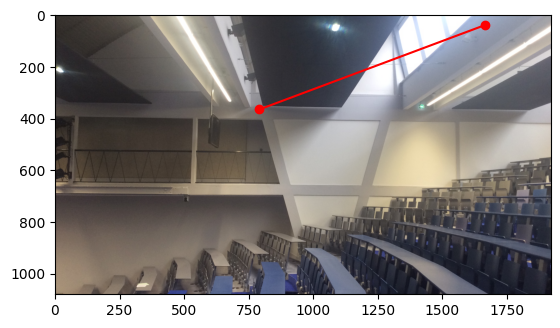

In [ ]:
import matplotlib.pyplot as plt
import cv2

def plot_segment_on_image(image_name, segment):
    img_path = f"/content/drive/MyDrive/Datasets/toulouse/tvpd_dataset/indoor/{image_name}.jpg"  # Adjust this as per your directory structure
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    plt.imshow(img)
    plt.plot([segment[0], segment[2]], [segment[1], segment[3]], 'ro-')
    plt.show()
!ls "/content/drive/MyDrive/Datasets/toulouse/"

# Use this function to plot some of the error segments
# For example:
plot_segment_on_image("img_1306", [ 791,  364, 1663,   38])


2. Feature Engineering:
Given the structure of the segments (start and end coordinates), you can derive a few additional features that might help the model differentiate between vanishing points. Here are some you can consider:

Segment Length: The Euclidean distance between the two end points.
Segment Slope: The slope of the segment might give indications about its orientation.
Segment Mid-point: The point that lies midway between the start and end of the segment. This can help determine the segment's position relative to the center of the image.

In [ ]:
# # Calculate segment length
# def segment_length(segment):
#     x1, y1, x2, y2 = segment
#     return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# # Calculate segment slope
# def segment_slope(segment):
#     x1, y1, x2, y2 = segment
#     if x2 - x1 == 0:  # Avoid division by zero for vertical segments
#         return np.inf
#     return (y2 - y1) / (x2 - x1)

# # Calculate segment mid-point
# def segment_midpoint(segment):
#     x1, y1, x2, y2 = segment
#     return [(x1 + x2)/2, (y1 + y2)/2]

# # Extract the new features for the dataset
# lengths = np.array([segment_length(segment) for segment in X])
# slopes = np.array([segment_slope(segment) for segment in X])
# midpoints = np.array([segment_midpoint(segment) for segment in X])

# # Combine original and new features
# X_combined = np.hstack([X, lengths[:, np.newaxis], slopes[:, np.newaxis], midpoints])











# Compute segment lengths
segment_lengths = np.linalg.norm(X[:, 2:4] - X[:, 0:2], axis=1).reshape(-1, 1)

# Compute segment orientations
orientations = np.arctan2(X[:, 3] - X[:, 1], X[:, 2] - X[:, 0]).reshape(-1, 1)

# Combine the original segment data, segment_lengths, and orientations
X_combined = np.hstack([X, segment_lengths, orientations])



In [ ]:
print("Length of segments_list:", len(segments_list))
print("Length of each segment in segments_list:", [len(seg) for seg in segments_list[:10]])  # print lengths of first 10 segments
print("Length of vp_assoc_list:", len(vp_assoc_list))


X = np.vstack(segments_list)
y = np.hstack(vp_assoc_list)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Length of segments_list: 48
Length of each segment in segments_list: [12, 13, 10, 15, 14, 17, 14, 14, 13, 16]
Length of vp_assoc_list: 48
Shape of X: (768, 4)
Shape of y: (768,)


In [ ]:
import numpy as np

# Compute length of each segment
lengths = np.sqrt((X[:,2] - X[:,0])**2 + (X[:,3] - X[:,1])**2)

# Compute angle of each segment
angles = np.degrees(np.arctan2(X[:,3] - X[:,1], X[:,2] - X[:,0]))

# Reshape for concatenation
lengths = lengths.reshape(-1, 1)
angles = angles.reshape(-1, 1)

# Combine original features with the new ones
X_combined = np.hstack([X, lengths, angles])


2. Splitting the Data
Let's split the combined dataset (X_combined) into training and validation sets.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train_comb, X_val_comb, y_train, y_val = train_test_split(X_combined, y, test_size=0.2, random_state=42)


3. Model Training
Now, let's train the Random Forest classifier using the enhanced dataset.

have added new features, the next step would be to train and test the model on the augmented dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the Random Forest classifier
clf_enhanced = RandomForestClassifier(n_estimators=100, random_state=42)
clf_enhanced.fit(X_train_comb, y_train)

# Predict on validation set and report the accuracy
y_pred = clf_enhanced.predict(X_val_comb)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           1       0.87      0.92      0.89        50
           2       1.00      0.95      0.97        55
           3       0.92      0.92      0.92        49

    accuracy                           0.93       154
   macro avg       0.93      0.93      0.93       154
weighted avg       0.93      0.93      0.93       154



__________________________

________________________________________________________________________________

Data Preparation:

We'll normalize the segment data to ensure that all input values are within a similar scale.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as before
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


Neural Network Architecture:
For this, we'll use TensorFlow and Keras:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')  # 3 units for 3 classes, softmax for classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Training::

In [ ]:
history = model.fit(X_train, y_train-1, epochs=50, validation_data=(X_val, y_val-1), batch_size=32)
# Note: we do y_train-1 and y_val-1 because Keras expects labels to start from 0


Epoch 1/50
20/20 [==============================] - 1s 14ms/step - loss: 1.0070 - accuracy: 0.5765 - val_loss: 0.9210 - val_accuracy: 0.6883
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.8481 - accuracy: 0.6661 - val_loss: 0.7840 - val_accuracy: 0.7013
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 0.7244 - accuracy: 0.6906 - val_loss: 0.6792 - val_accuracy: 0.7662
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.6436 - accuracy: 0.7036 - val_loss: 0.6186 - val_accuracy: 0.7662
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5962 - accuracy: 0.7085 - val_loss: 0.5856 - val_accuracy: 0.7792
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5732 - accuracy: 0.7248 - val_loss: 0.5686 - val_accuracy: 0.7792
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5556 - accuracy: 0.7410 - val_loss: 0.5501 - val_accuracy: 0.7792
Epoch 8/50
20/20 [=

Great! The output you've shared appears to be from training a neural network for 50 epochs. Here's a quick interpretation of the results:

1. **Training Data**:
    - Your model started with an accuracy of approximately 57.65% on the training data in the first epoch. By the end of the 50th epoch, the accuracy on the training data had increased to about 88.93%. This indicates that your model learned from the training data and improved its performance over time.

2. **Validation Data**:
    - The model began with an accuracy of approximately 68.83% on the validation data. By the end of the 50th epoch, the accuracy had increased to about 87.66%.
    - Validation data is crucial as it helps you understand how well your model is likely to perform on unseen data. The increasing accuracy on the validation data indicates that the model is not just memorizing the training data but is actually learning patterns that are generalizable.

3. **Overfitting**:
    - Overfitting occurs when a model performs well on the training data but poorly on the validation or test data. This is typically indicated by a continuously decreasing validation loss and accuracy while the training metrics continue to improve.
    - In your case, both training and validation accuracy seem to increase together, which is a good sign. However, there is always some fluctuation in the validation accuracy, which is normal.

4. **Loss**:
    - The loss values are also decreasing for both training and validation datasets, which is a good sign. It means the model's predictions are getting closer to the actual values.

5. **Final Thoughts**:
    - An accuracy of around 88% on the validation set after 50 epochs seems decent, depending on the complexity of the dataset and the problem you're tackling. However, there's always room for improvement.
    - Consider fine-tuning the model, experimenting with the architecture, or using techniques like data augmentation to potentially increase performance further.
    - If you have a test set, evaluate the model on it to see its real-world performance.

Remember, the ultimate goal is not to achieve 100% accuracy, but rather to create a model that generalizes well to new, unseen data.

________________________________________________________________________________

________________________________________________________________________________

seperation

using geometric techniques.

In [ ]:
def detect_edges(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    return edges

def detect_lines(edges):
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    return lines

def compute_intersections(lines):
    intersections = []
    for i in range(len(lines)):
        for j in range(i+1, len(lines)):
            rho1, theta1 = lines[i][0]
            rho2, theta2 = lines[j][0]
            A = np.array([
                [np.cos(theta1), np.sin(theta1)],
                [np.cos(theta2), np.sin(theta2)]
            ])
            b = np.array([[rho1], [rho2]])

            # Check if the lines are parallel
            if np.linalg.cond(A) < 1/sys.float_info.epsilon:
                x0, y0 = np.linalg.solve(A, b)
                intersections.append([x0, y0])
    return np.array(intersections).reshape(-1, 2)

def cluster_points(points):
    mean_shift = MeanShift(bandwidth=100).fit(points)
    cluster_centers = mean_shift.cluster_centers_
    labels = mean_shift.labels_

    # Finding the cluster center with the maximum number of points
    label, count = np.unique(labels, return_counts=True)[0], np.unique(labels, return_counts=True)[1]
    max_cluster_label = label[np.argmax(count)]
    vp = cluster_centers[max_cluster_label]

    return tuple(vp.astype(int))


now we can use these functions to process an image

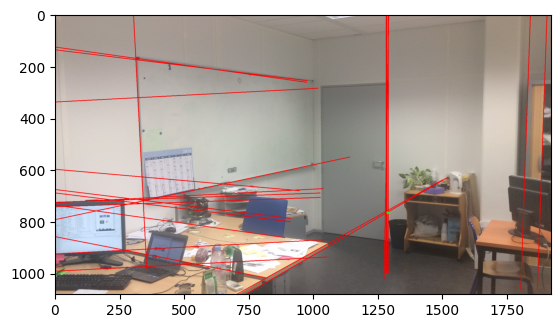

In [ ]:
import sys
from sklearn.cluster import MeanShift

image_path = "/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/img_1821.jpg"  # Adjust this path as needed
img = cv2.imread(image_path)
edges = detect_edges(img)
lines = detect_lines(edges)

if lines is not None:
    intersections = compute_intersections(lines)
    vanishing_point = cluster_points(intersections)

    # Visualize
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    cv2.circle(img, vanishing_point, 5, (0, 255, 0), -1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()


In [ ]:
import scipy.io

# Load the .mat file
data = scipy.io.loadmat('/content/drive/My Drive/Datasets/toulouse/tvpd_dataset/indoor/img_1284.mat')


In [ ]:
# Print the keys (variable names) from the loaded .mat file
print(data.keys())

print(data['vp_association'])


dict_keys(['__header__', '__version__', '__globals__', 'vp_association', 'endptAccuracy', 'imu_values', 'raw_rot', 'polys', 'mean_rot', 'segments', 'calib_rot'])
[[1 1 1 1 1 2 2 2 2 2 2 3 3 3 3]]
